## Sales Data of Company XYZ from June to August, 2021.

This analytical report seeks to answer the following:
- The total sales for each payment method
- The average unit price for each product line
- The total and average purchase value of each client types
- The total purchase value of each product line
- The total sales of each warehouse

### Importing Libraries needed for analysis and visualizations

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import re

#set jupyter to display up to 50 columns, so we can see evrything
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)

sns.set_style('whitegrid')
#show figures in notebook
%matplotlib inline 

#### Loading dataset to be used for analysis (sales_data.csv)

In [32]:
motor = pd.read_csv('sales_data.csv', parse_dates= ['date']) 
motor.head(10)

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
5,2021-06-01,North,Wholesale,Suspension & traction,40,37.37,1494.80,Transfer
6,2021-06-01,West,Retail,Electrical system,2,27.20,54.41,Credit card
7,2021-06-01,Central,Retail,Breaking system,10,22.44,224.38,Credit card
8,2021-06-01,West,Wholesale,Frame & body,40,39.50,1579.87,Transfer
9,2021-06-01,North,Retail,Frame & body,6,45.44,272.61,Credit card


### Checking the properties of the data

In [4]:
motor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [5]:
motor.shape

(1000, 8)

In [6]:
#Checking or missing values
motor.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [7]:
#Checking for duplicates
motor.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
#To coun the duplictes in the dataset
motor.duplicated().sum()

0

#### Observations:
- The dataset has 1000 rows/observations and 8 columns/features.
- There are no missing values in the dataset.
- There are also no duplicates.
- This dataset is clean and ready for analysis.

### Descriptive Statistics of dataset

In [9]:
#Statistical summary of numrical columns: 'Quantity', 'UnitPrice' and 'Customer ID'
motor.describe()

,quantity,unit_price,total
count,1000.000000,1000.000000,1000.000000
mean,9.395000,30.322040,289.113000
std,9.659207,12.256488,345.227596
min,1.000000,10.030000,10.350000
25%,4.000000,21.085000,93.687500
50%,6.500000,28.570000,178.360000
75%,10.000000,37.917500,321.690000
max,40.000000,66.620000,2546.330000


The following insights can be drawn from the table above:
- The highest purchase made at once was 2,546.33 while the lowest was 10.35

In [10]:
#Summary of the object or categorical columns by first creating a variable that holds such columns
object_col = motor.dtypes[motor.dtypes=='object'].index
motor[object_col].describe()

,warehouse,client_type,product_line,payment
count,1000,1000,1000,1000
unique,3,2,6,3
top,Central,Retail,Breaking system,Credit card
freq,480,775,230,659


The table above shows:
- The number of unique values of each of the columns, for example we can tell that client_type has only 2 unique values
- That the dataset has more records from the Central warehouse even though this does not mean that thi warehouse had more sales.
- The most frequent client type was retail
- The Break system product_line made the most sale (77.5% of total) 

In [16]:
#Checking  the unqiue values of object or categorical columns
motor.warehouse.unique()

array(['Central', 'North', 'West'], dtype=object)

In [17]:
motor.client_type.unique()

array(['Retail', 'Wholesale'], dtype=object)

In [18]:
motor.product_line.unique()

array(['Miscellaneous', 'Breaking system', 'Suspension & traction',
       'Frame & body', 'Engine', 'Electrical system'], dtype=object)

In [19]:
motor.payment.unique()

array(['Credit card', 'Cash', 'Transfer'], dtype=object)

There are:
- 3 warehouses
- 2 client types
- 6 poduct lines
- 3 payent methods

### Question 1
What are the total sales for each payment method?

In [38]:
total_sales_payment= motor.groupby('payment').total.agg([sum]).reset_index()
total_sales_payment

,payment,sum
0,Cash,19199.10
1,Credit card,110271.57
2,Transfer,159642.33


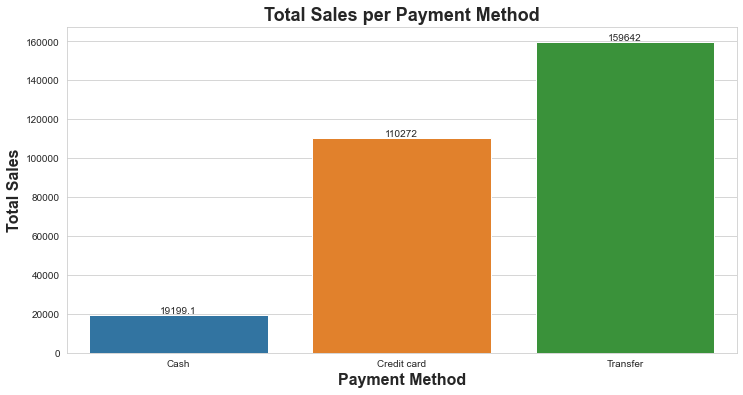

In [30]:
plt.figure(figsize=(12, 6))
tp= sns.barplot(x='payment', y= 'sum', data= total_sales_payment)
plt.title('Total Sales per Payment Method', fontweight= 'bold', fontsize= 18)
plt.xlabel('Payment Method',  fontweight= 'bold', fontsize= 16)
plt.ylabel('Total Sales',  fontweight= 'bold', fontsize= 16);
for i in tp.containers:
    tp.bar_label(i)

### Question 2
What is the average unit price for each product line?

In [36]:
av_unit_price= motor.groupby('product_line').unit_price.mean().reset_index()
av_unit_price

,product_line,unit_price
0,Breaking system,17.740522
1,Electrical system,25.585130
2,Engine,60.091803
3,Frame & body,42.832229
4,Miscellaneous,22.810738
5,Suspension & traction,33.969868


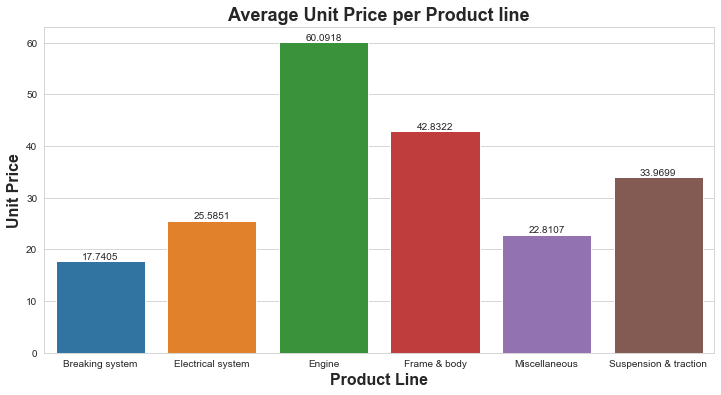

In [39]:
plt.figure(figsize=(12, 6))
tp= sns.barplot(x='product_line', y= 'unit_price', data= av_unit_price)
plt.title('Average Unit Price per Product line', fontweight= 'bold', fontsize= 18)
plt.xlabel('Product Line',  fontweight= 'bold', fontsize= 16)
plt.ylabel('Unit Price',  fontweight= 'bold', fontsize= 16);
for i in tp.containers:
    tp.bar_label(i)

 ### Question 3
 What is the average purchase value by client type?

In [40]:
av_purchase_value= motor.groupby('client_type').total.mean().reset_index()
av_purchase_value

,client_type,total
0,Retail,167.058929
1,Wholesale,709.521467


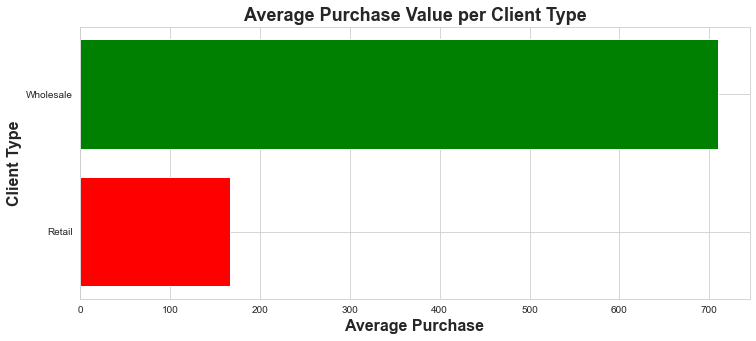

In [59]:
plt.figure(figsize=(12, 5))
colors= ['red', 'green']
plt.barh(av_purchase_value.client_type, av_purchase_value.total, color= colors )
plt.title('Average Purchase Value per Client Type', fontweight= 'bold', fontsize= 18)
plt.xlabel('Average Purchase',  fontweight= 'bold', fontsize= 16)
plt.ylabel('Client Type',  fontweight= 'bold', fontsize= 16)
plt.show()

### Question 4
What is the total purchase value by product line?

In [46]:
total_purchase_value= motor.groupby('product_line').total.agg([sum]).reset_index()
total_purchase_value

,product_line,sum
0,Breaking system,38350.15
1,Electrical system,43612.71
2,Engine,37945.38
3,Frame & body,69024.73
4,Miscellaneous,27165.82
5,Suspension & traction,73014.21


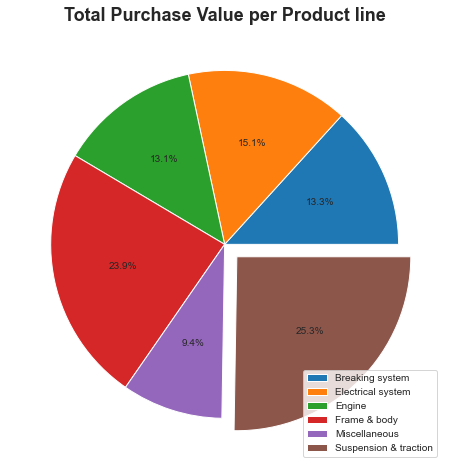

In [56]:
plt.figure(figsize=(18, 8))
explodes= [0,0,0,0,0,0.1]
x= [38350.15, 43612.71, 37945.38, 69024.73, 27165.82, 73014.21]
labels= 'Breaking system', 'Electrical system', 'Engine', 'Frame & body', 'Miscellaneous', 'Suspension & traction' 

plt.pie(x, explode= explodes, autopct= '%1.1f%%')
plt.title('Total Purchase Value per Product line', fontweight= 'bold', fontsize= 18)
plt.legend(labels, loc='lower right')
plt.show()

### Question 6
What is the total sales fo each warehouse?

In [74]:
total_sales_warehouse= motor.groupby('warehouse').total.agg([sum]).reset_index()
total_sales_warehouse

,warehouse,sum
0,Central,141982.88
1,North,100203.63
2,West,46926.49


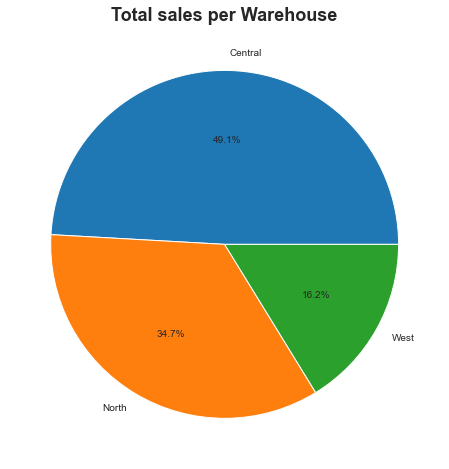

In [77]:
plt.figure(figsize=(18, 8))
explodes= [0,0,0]
x= [141982.88, 100203.63, 46926.49]
labels= 'Central', 'North', 'West'

plt.pie(x, explode= explodes, labels= labels, autopct= '%1.1f%%')
plt.title('Total sales per Warehouse', fontweight= 'bold', fontsize= 18)
plt.show()

### Summary of findings:
- Although credit card was the most fequently used payment method, a larger sum was paid through the transfer method.
- Payment through cash method accounted for only 6.64% of total ammoout paid.
- Products from the engine product line had the highest average unit price (60.09) while products from Breaking system had the lowest unit price (17.74).
- The avaerage purchase value of wholesale clients was far greater than that of retail clients.
- The total purchase value of wholesale clients was also greater than that of retail clients even though sales by rtail clients were more frequent.
- Suspension & traction product line had the highest purchase value (25.3%) while Miscellaneous had the lowest (9.4%).
- The Central warehouse is the most valueable warehouse as it had the highest total sales (49.1%) which is almost half of total slaes from all three warehouses. West warehouse on the othe hand had the lowest total sales (16.2%).